# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url+city).json()
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | berberati
Processing Record 2 of Set 1 | mossendjo
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | husavik
Processing Record 6 of Set 1 | astana
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | saint george
Processing Record 11 of Set 1 | tura
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | bereda
Processing Record 14 of Set 1 | kieta
Processing Record 15 of Set 1 | tilichiki
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | apax

Processing Record 37 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 4 | buala
Processing Record 39 of Set 4 | valera
Processing Record 40 of Set 4 | prince rupert
Processing Record 41 of Set 4 | iqaluit
Processing Record 42 of Set 4 | acapetahua
Processing Record 43 of Set 4 | zaysan
Processing Record 44 of Set 4 | bella vista
Processing Record 45 of Set 4 | richards bay
Processing Record 46 of Set 4 | narsaq
Processing Record 47 of Set 4 | nizhniy tsasuchey
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | huaihua
Processing Record 0 of Set 5 | bethel
Processing Record 1 of Set 5 | chase
Processing Record 2 of Set 5 | abu samrah
Processing Record 3 of Set 5 | tankhoy
Processing Record 4 of Set 5 | san carlos de bariloche
Processing Record 5 of Set 5 | acapulco
Processing Record 6 of Set 5 | havre-saint-pierre
Processing Record 7 of Set 5 | touros
Processing Record 8 of Set 5 | newcastle
Processing Record 9 of Set 5 | puerto ayora
Proc

Processing Record 25 of Set 8 | da lat
Processing Record 26 of Set 8 | waipawa
Processing Record 27 of Set 8 | batagay
Processing Record 28 of Set 8 | oyem
Processing Record 29 of Set 8 | tapes
Processing Record 30 of Set 8 | ekhabi
Processing Record 31 of Set 8 | raudeberg
Processing Record 32 of Set 8 | kachiry
Processing Record 33 of Set 8 | inuvik
Processing Record 34 of Set 8 | yumen
Processing Record 35 of Set 8 | vila franca do campo
Processing Record 36 of Set 8 | puerto baquerizo moreno
Processing Record 37 of Set 8 | boyuibe
Processing Record 38 of Set 8 | arroyo
Processing Record 39 of Set 8 | powell river
Processing Record 40 of Set 8 | springfield
Processing Record 41 of Set 8 | abohar
Processing Record 42 of Set 8 | muros
Processing Record 43 of Set 8 | anito
Processing Record 44 of Set 8 | upington
Processing Record 45 of Set 8 | tolstoy-yurt
Processing Record 46 of Set 8 | shelburne
Processing Record 47 of Set 8 | zachagansk
City not found. Skipping...
Processing Record

Processing Record 14 of Set 12 | alta
Processing Record 15 of Set 12 | wawina
Processing Record 16 of Set 12 | kamenskiy
Processing Record 17 of Set 12 | henties bay
Processing Record 18 of Set 12 | pegnitz
Processing Record 19 of Set 12 | biak
Processing Record 20 of Set 12 | sorong
Processing Record 21 of Set 12 | jardim
Processing Record 22 of Set 12 | qena
Processing Record 23 of Set 12 | shasta lake
Processing Record 24 of Set 12 | arman
Processing Record 25 of Set 12 | ratangarh
Processing Record 26 of Set 12 | tuatapere
Processing Record 27 of Set 12 | sal rei
Processing Record 28 of Set 12 | alta floresta
Processing Record 29 of Set 12 | tessalit
Processing Record 30 of Set 12 | ormenion
City not found. Skipping...
Processing Record 31 of Set 12 | biskamzha
Processing Record 32 of Set 12 | svetlyy
Processing Record 33 of Set 12 | half moon bay
Processing Record 34 of Set 12 | manavalakurichi
Processing Record 35 of Set 12 | gravdal
Processing Record 36 of Set 12 | onguday
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          556
Lat           556
Lng           556
Max Temp      556
Humidity      556
Cloudiness    556
Wind Speed    556
Country       556
Date          556
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,berberati,4.2612,15.7922,21.85,26,0,0.89,CF,1673299702
1,mossendjo,-2.9506,12.7261,20.98,99,100,0.56,CG,1673299702
2,bredasdorp,-34.5322,20.0403,20.87,81,2,1.46,ZA,1673299637
3,yellowknife,62.4560,-114.3525,-11.71,92,100,1.54,CA,1673299702
4,husavik,66.0449,-17.3389,1.47,99,100,7.38,IS,1673299702


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample

<bound method NDFrame.sample of                 City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                   
0          berberati   4.2612   15.7922     21.85        26           0   
1          mossendjo  -2.9506   12.7261     20.98        99         100   
2         bredasdorp -34.5322   20.0403     20.87        81           2   
3        yellowknife  62.4560 -114.3525    -11.71        92         100   
4            husavik  66.0449  -17.3389      1.47        99         100   
...              ...      ...       ...       ...       ...         ...   
551       winchester  51.0651   -1.3187      6.90        87          75   
552            boffa  10.1667  -14.0333     25.38        40          82   
553           murgab  37.4966   61.9714     -2.07       100         100   
554         pasighat  28.0667   95.3333     12.63        50           0   
555           bitung   1.4451  125.1824     25.47        80         

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

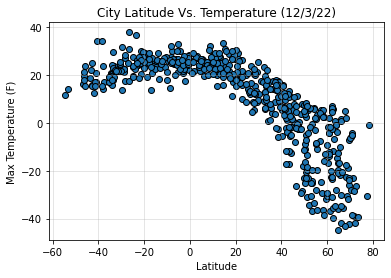

In [38]:
# Build scatter plot for latitude vs. temperature
xl = city_data_df['Lat']
yt = city_data_df['Max Temp']
plt.scatter(xl, yt, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Temperature (12/3/22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=.4)

# Save the figure
plt.savefig("output_data/Fig1.png", dpi=300, facecolor='white', transparent=False)

# Show plot
plt.show()

#### Latitude Vs. Humidity

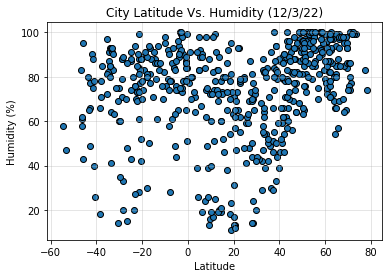

In [39]:
# Build the scatter plots for latitude vs. humidity
yh = city_data_df['Humidity']
plt.scatter(xl, yh, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity (12/3/22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=.4)

# Save the figure
plt.savefig("output_data/Fig2.png", dpi=300, facecolor='white', transparent=False)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

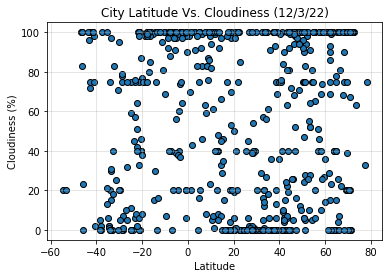

In [40]:
# Build the scatter plots for latitude vs. cloudiness
yc = city_data_df['Cloudiness']
plt.scatter(xl, yc, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness (12/3/22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=.4)

# Save the figure
plt.savefig("output_data/Fig3.png", dpi=300, facecolor='white', transparent=False)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

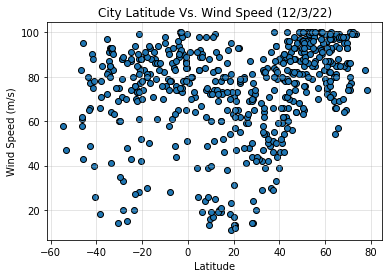

In [41]:
# Build the scatter plots for latitude vs. wind speed
yw = city_data_df['Wind Speed']
plt.scatter(xl, yh, edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed (12/3/22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(alpha=.4)

# Save the figure
plt.savefig("output_data/Fig4.png", dpi=300, facecolor='white', transparent=False)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def LR(x, y, xl, yl):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x, y)
    plt.xlabel(xl)
    plt.ylabel(yl)    
    print(f"The r-squared is: {rvalue**2}")
    print(line_eq)
    plt.plot(x, regress_values, "r-")
    #plt.annotate(line_eq, xy=(25, 30), fontsize=14, color="red")
    plt.show()


In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berberati,4.2612,15.7922,21.85,26,0,0.89,CF,1673299702
3,yellowknife,62.4560,-114.3525,-11.71,92,100,1.54,CA,1673299702
4,husavik,66.0449,-17.3389,1.47,99,100,7.38,IS,1673299702
5,astana,51.1801,71.4460,-31.03,76,0,5.00,KZ,1673299703
7,ilulissat,69.2167,-51.1000,-18.99,65,20,1.03,GL,1673299703


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,mossendjo,-2.9506,12.7261,20.98,99,100,0.56,CG,1673299702
2,bredasdorp,-34.5322,20.0403,20.87,81,2,1.46,ZA,1673299637
6,hobart,-42.8794,147.3294,15.70,77,75,1.54,AU,1673299703
8,mataura,-46.1927,168.8643,19.52,61,100,0.09,NZ,1673299704
11,new norfolk,-42.7826,147.0587,15.51,66,72,0.81,AU,1673299704


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.690141207237041
y = -0.8x + 35.09


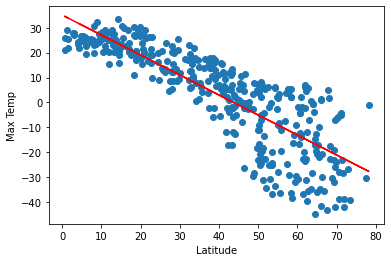

In [45]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']

LR(x, y, xl="Latitude", yl="Max Temp")

The r-squared is: 0.18149174215893787
y = 0.14x + 26.57


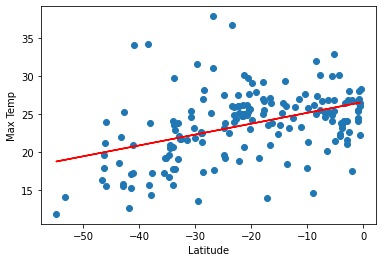

In [46]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']

LR(x, y, xl="Latitude", yl="Max Temp")

**Discussion about the linear relationship:** 
    The Northern Hemisphere's temperature decreases as the latitude increases being a STRONG NEGATIVE relationship. The Southern Hemisphere's temperature increases as the latitude increases. The plots are more spaced but the line of best fit is rising as latitude increases, meaning the Southern HEmisphere is showing a WEAK POSITIVE relationship.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.21934202139182013
y = 0.51x + 53.46


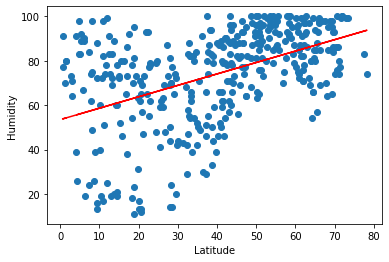

In [47]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']

LR(x, y, xl="Latitude", yl="Humidity")

The r-squared is: 0.06594403336214791
y = 0.36x + 82.22


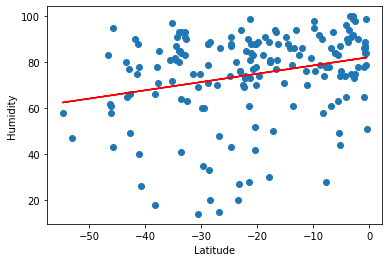

In [48]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']

LR(x, y, xl="Latitude", yl="Humidity")

**Discussion about the linear relationship:** 
    The Northern Hemisphere shows a STRONG POSITIVE with the plots being more compact together and the line of best fit increasing as latitude increases. The Southern Hemisphere also shows an increasing line of best fit while latitude increases BUT with the plots being more spread out, it represents a WEAK POSITIVE releationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.009701771264972753
y = 0.2x + 44.59


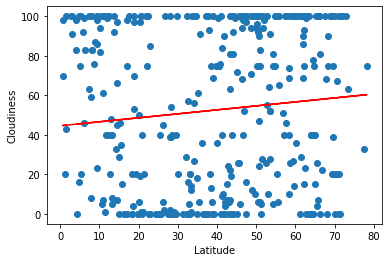

In [49]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']

LR(x, y, xl="Latitude", yl="Cloudiness")

The r-squared is: 0.09586290496484964
y = 0.89x + 77.38


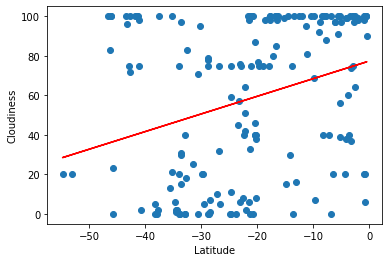

In [50]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']

LR(x, y, xl="Latitude", yl="Cloudiness")

**Discussion about the linear relationship:** 
    The Northern Hemisphere shows a STRONG POSITIVE with having more condensed plots while the Southern Hemisphere shows a WEAK POSITIVE with more spaced out plots. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.008795604033794872
y = 0.01x + 3.41


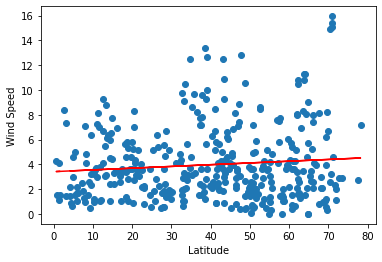

In [51]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']

LR(x, y, xl="Latitude", yl="Wind Speed")

The r-squared is: 0.104365946530804
y = -0.06x + 2.37


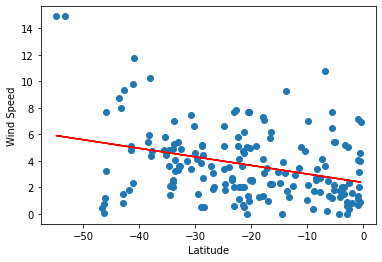

In [52]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']

LR(x, y, xl="Latitude", yl="Wind Speed")

**Discussion about the linear relationship:** 
    In both the scatter plots, the majority of windspeed by latidude appears to be below the 8 mark by windspeed. For the Northern Hemisphere there are more higher windspeed as latidude increases being a STRONG POSITIVE. However the Southern Hemisphere appears to be a WEAK NEGATIVE. 